In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pyecharts.render import make_snapshot
from snapshot_pyppeteer import snapshot
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType

In [2]:
def bar_plot(models, matrix):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 设置柱状图的位置
    index = np.arange(len(models))
    bar_width = 0.2

    # 绘制每个指标的柱状图
    for i, (metric, values) in enumerate(metrics.items()):
        ax.barh(index + i * bar_width, values, height=bar_width, label=metric)

    # 设置图形的标签、标题和图例
    ax.set_xlabel('Scores')
    ax.set_ylabel('Models')
    ax.set_title('Models Comparison')
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(models)
    ax.legend()

    # 显示图形
    plt.show()

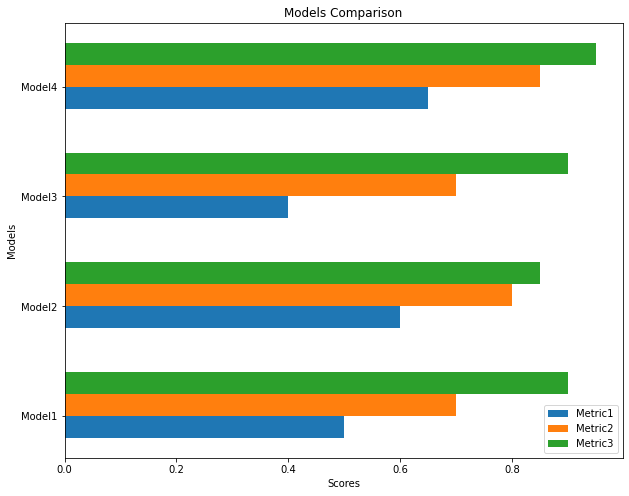

In [3]:
models = ['Model1', 'Model2', 'Model3', 'Model4']
metrics = {
    'Metric1': [0.5, 0.6, 0.4, 0.65],
    'Metric2': [0.7, 0.8, 0.7, 0.85],
    'Metric3': [0.9, 0.85, 0.9, 0.95]
}
bar_plot(models, metrics)

In [4]:
def draw_pyecharts(xaxis, data, config):
    """
    @param data: 二维数组，每行对应一个方法抛出的结果数据，每列对应lable
    @param data_temp: 字典类型，存储了一些配置信息，画图需要用到 “names”对应的列表，存储了画图生成的图片的方法名称
    @param config: 与上面相同
    @return: NAN（快跑，不要维护）
    """
    """demo
    data = [[0.665, 0.6266666666666667, 0.7033333333333334, 0.7083666666666667, 0.33097412973151036]]
    lable = ['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score']
    """
    bar = Bar(init_opts=opts.InitOpts(width="450px", height="350px", theme=ThemeType.LIGHT))
    bar.add_xaxis(xaxis)
    bar.add_yaxis("Ours", data['Ours'], stack="stack1")
    bar.add_yaxis("RNN", data['RNN'], stack="stack1")
    bar.add_yaxis("methBERT", data['methBERT'], stack="stack1")
    bar.set_global_opts(toolbox_opts=opts.ToolboxOpts(is_show=False), legend_opts=opts.LegendOpts(pos_left="80%"))
    bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    make_snapshot(snapshot, bar.render(), '{}/{}.{}'.format(config['savepath'], 'length_statistics_train_pyecharts', 'png'))
    make_snapshot(snapshot, bar.render(), '{}/{}.{}'.format(config['savepath'], 'length_statistics_train_pyecharts', 'pdf'))
    make_snapshot(snapshot, bar.render(), '{}/{}.{}'.format(config['savepath'], 'length_statistics_train_pyecharts', 'svg'))

In [5]:
models = ['Model1', 'Model2', 'Model3', 'Model4']
metrics = {
    'Ours': [0.5, 0.6, 0.4, 0.65],
    'RNN': [0.7, 0.8, 0.7, 0.85],
    'methBERT': [0.9, 0.85, 0.9, 0.95]
}
config = {
    'savepath': '.'
}
draw_pyecharts(models, metrics, config)

RuntimeError: This event loop is already running

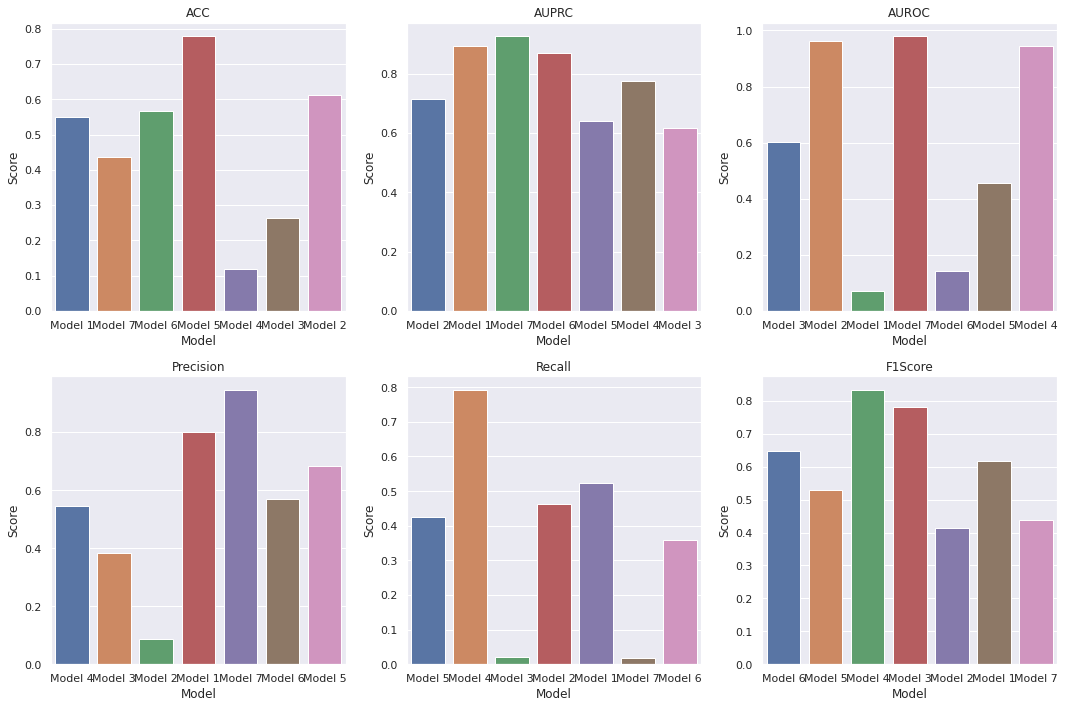

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 使seaborn成为默认的绘图主题
sns.set_theme()

# 创建一个模拟的性能指标DataFrame
np.random.seed(0)
performance_data = pd.DataFrame({
    'Model': ['Model {}'.format(i) for i in range(1, 8)] * 6,
    'Metric': ['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score'] * 7,
    'Score': np.random.rand(42)
})

# 创建2行3列的图形网格
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 为每个性能指标创建一个柱状图
for i, metric in enumerate(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score']):
    ax = axs[i // 3, i % 3]
    data = performance_data[performance_data['Metric'] == metric]
    sns.barplot(data=data, x='Model', y='Score', ax=ax, palette=sns.color_palette())
    ax.set_title(metric)
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()


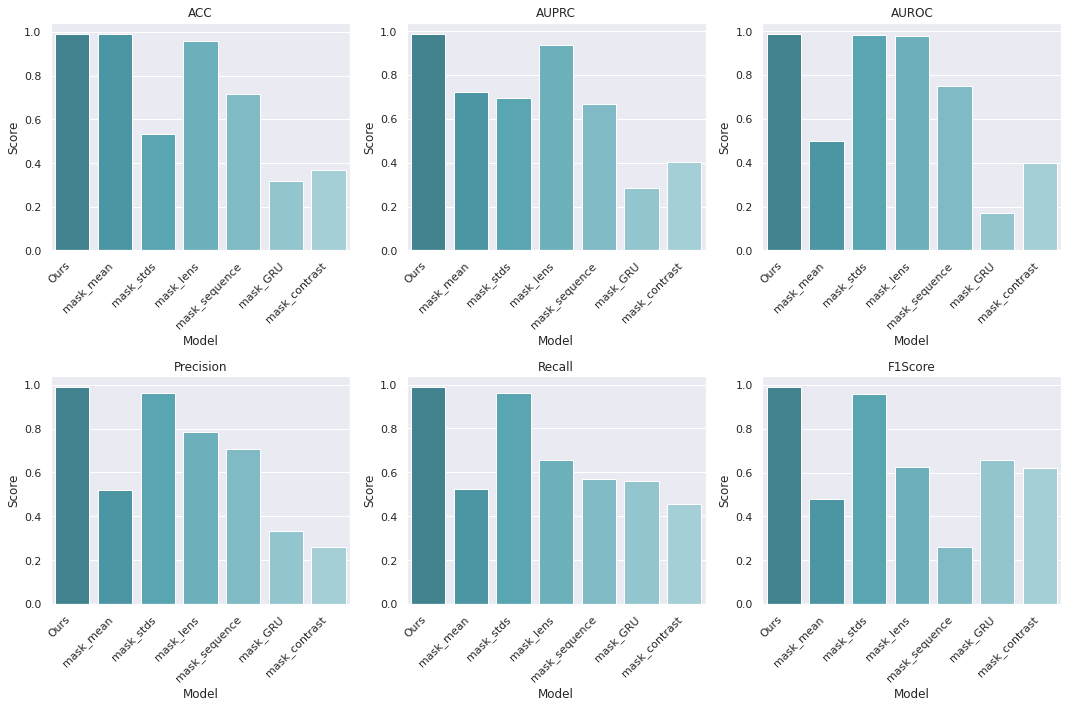

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 使seaborn成为默认的绘图主题
sns.set_theme()

# 创建一个模拟的性能指标DataFrame，你需要将这些值替换为你的实际数据
performance_data = pd.DataFrame({
    'Model': ['Ours', 'mask_mean', 'mask_stds', 'mask_lens', 'mask_sequence', 'mask_GRU', 'mask_contrast'] * 6,
    'Metric': ['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score'] * 7,
    'Score': [0.9924, 0.9889, 0.9887, 0.9894, 0.9884, 0.9899, 0.9913,   # ACC scores for all models
              0.7223, 0.4977, 0.5188, 0.5240, 0.4802, 0.5324, 0.6954,   # AUPRC scores for all models
              0.9809, 0.9609, 0.9632, 0.9599, 0.9580, 0.9365, 0.9756,   # AUROC scores for all models
              0.7865, 0.6555, 0.6270, 0.7161, 0.6678, 0.7502, 0.7075,   # Precision scores for all models
              0.5699, 0.2602, 0.3175, 0.2855, 0.1689, 0.3327, 0.5600,   # Recall scores for all models
              0.6557, 0.3690, 0.4056, 0.3990, 0.2611, 0.4540, 0.6217]   # F1Score scores for all models
})

# 0.9924 	0.7223 	0.9809 	0.7865 	0.5699 	0.6557 
# 0.9889 	0.4977 	0.9609 	0.6555 	0.2602 	0.3690 
# 0.9887 	0.5188 	0.9632 	0.6270 	0.3175 	0.4056 
# 0.9894 	0.5240 	0.9599 	0.7161 	0.2855 	0.3990 
# 0.9884 	0.4802 	0.9580 	0.6678 	0.1689 	0.2611 
# 0.9899 	0.5324 	0.9365 	0.7502 	0.3327 	0.4540 
# 0.9913 	0.6954 	0.9756 	0.7075 	0.5600 	0.6217 


# 指定模型名称的顺序
# model_order = ['Ours', 'mask_mean', 'mask_stds', 'mask_lens', 'mask_sequence', 'mask_GRU', 'mask_contrast']
palette = sns.color_palette(['#378C9B', '#3EA0B1', '#4BAFC1', '#5FB9C9', '#74C2D0', '#88CCD8', '#9DD5DF'])

# 创建2行3列的图形网格
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 为每个性能指标创建一个柱状图
for i, metric in enumerate(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score']):
    ax = axs[i // 3, i % 3]
    data = performance_data[performance_data['Metric'] == metric]
    sns.barplot(data=data, x='Model', y='Score', ax=ax, palette=palette)#, order=model_order)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(model_order, rotation=45, horizontalalignment='right')  # 旋转x轴的模型名称

plt.tight_layout()
# plt.savefig('abslution.svg', format='svg')
plt.show()


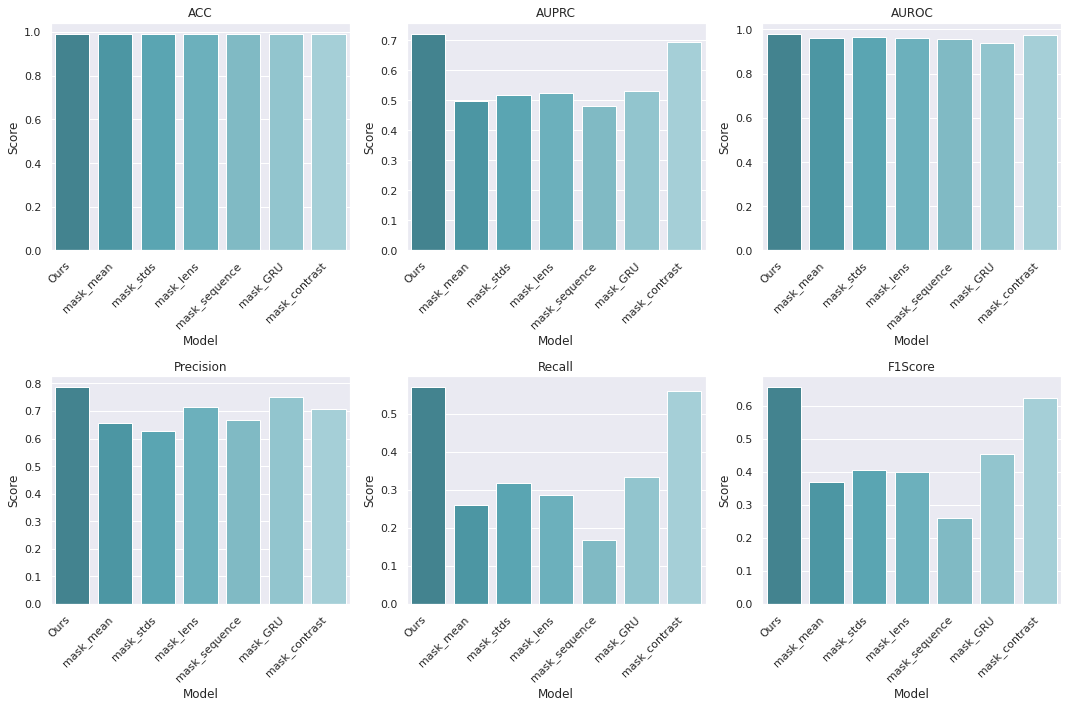

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 使seaborn成为默认的绘图主题
sns.set_theme()

# 指定模型名称的顺序
model_order = ['Ours', 'mask_mean', 'mask_stds', 'mask_lens', 'mask_sequence', 'mask_GRU', 'mask_contrast']

# 分数数据，你提供的数据已经按照你的顺序排列
scores = [
    [0.9924, 0.9889, 0.9887, 0.9894, 0.9884, 0.9899, 0.9913],  # ACC
    [0.7223, 0.4977, 0.5188, 0.5240, 0.4802, 0.5324, 0.6954],  # AUPRC
    [0.9809, 0.9609, 0.9632, 0.9599, 0.9580, 0.9365, 0.9756],  # AUROC
    [0.7865, 0.6555, 0.6270, 0.7161, 0.6678, 0.7502, 0.7075],  # Precision
    [0.5699, 0.2602, 0.3175, 0.2855, 0.1689, 0.3327, 0.5600],  # Recall
    [0.6557, 0.3690, 0.4056, 0.3990, 0.2611, 0.4540, 0.6217],  # F1Score
]

# 构建一个新的性能指标DataFrame
data = []
for metric, score in zip(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score'], scores):
    for model, model_score in zip(model_order, score):
        data.append({'Model': model, 'Metric': metric, 'Score': model_score})
performance_data = pd.DataFrame(data)

# 自定义一个淡蓝色和淡绿色的配色方案
palette = sns.color_palette(['#378C9B', '#3EA0B1', '#4BAFC1', '#5FB9C9', '#74C2D0', '#88CCD8', '#9DD5DF'])

# 创建2行3列的图形网格
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 为每个性能指标创建一个柱状图
for i, metric in enumerate(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score']):
    ax = axs[i // 3, i % 3]
    data = performance_data[performance_data['Metric'] == metric]
    sns.barplot(data=data, x='Model', y='Score', ax=ax, palette=palette, order=model_order)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(model_order, rotation=45, horizontalalignment='right')  # 旋转x轴的模型名称

plt.tight_layout()
# plt.savefig('abslution.svg', format='svg')
plt.show()
    

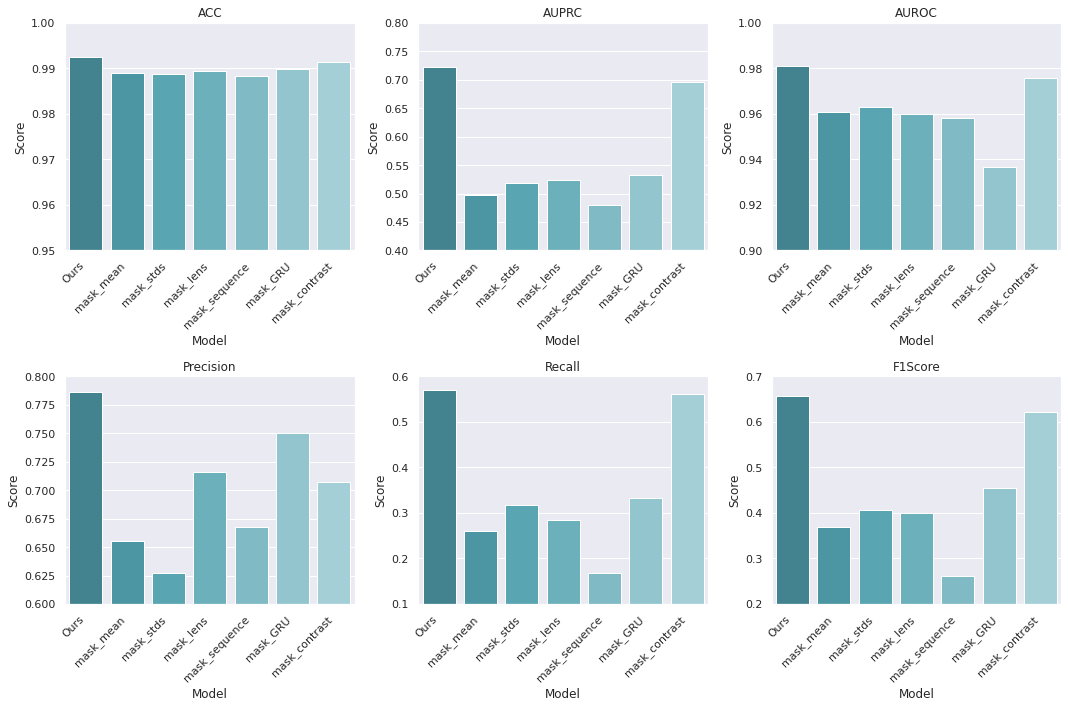

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 使seaborn成为默认的绘图主题
sns.set_theme()

# 指定模型名称的顺序
model_order = ['Ours', 'mask_mean', 'mask_stds', 'mask_lens', 'mask_sequence', 'mask_GRU', 'mask_contrast']

# 分数数据，你提供的数据已经按照你的顺序排列
scores = [
    [0.9924, 0.9889, 0.9887, 0.9894, 0.9884, 0.9899, 0.9913],  # ACC
    [0.7223, 0.4977, 0.5188, 0.5240, 0.4802, 0.5324, 0.6954],  # AUPRC
    [0.9809, 0.9609, 0.9632, 0.9599, 0.9580, 0.9365, 0.9756],  # AUROC
    [0.7865, 0.6555, 0.6270, 0.7161, 0.6678, 0.7502, 0.7075],  # Precision
    [0.5699, 0.2602, 0.3175, 0.2855, 0.1689, 0.3327, 0.5600],  # Recall
    [0.6557, 0.3690, 0.4056, 0.3990, 0.2611, 0.4540, 0.6217],  # F1Score
]

# 构建一个新的性能指标DataFrame
data = []
for metric, score in zip(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score'], scores):
    for model, model_score in zip(model_order, score):
        data.append({'Model': model, 'Metric': metric, 'Score': model_score})
performance_data = pd.DataFrame(data)

# 自定义一个淡蓝色和淡绿色的配色方案
palette = sns.color_palette(['#378C9B', '#3EA0B1', '#4BAFC1', '#5FB9C9', '#74C2D0', '#88CCD8', '#9DD5DF'])

# 创建2行3列的图形网格
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 定义每个指标的y轴范围
y_lims = [
    [0.95, 1.0],  # ACC
    [0.4, 0.8],    # AUPRC
    [0.9, 1.0],    # AUROC
    [0.6, 0.8],    # Precision
    [0.1, 0.6],    # Recall
    [0.2, 0.7]     # F1Score
]

# 为每个性能指标创建一个柱状图
for i, metric in enumerate(['ACC', 'AUPRC', 'AUROC', 'Precision', 'Recall', 'F1Score']):
    ax = axs[i // 3, i % 3]
    data = performance_data[performance_data['Metric'] == metric]
    sns.barplot(data=data, x='Model', y='Score', ax=ax, palette=palette, order=model_order)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(model_order, rotation=45, horizontalalignment='right')  # 旋转x轴的模型名称
    ax.set_ylim(y_lims[i])  # 调整y轴范围

plt.tight_layout()
plt.savefig('abslution.svg', format='svg')
plt.show()